https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/ABBANK.csv' , parse_dates=['DATE'])

In [ ]:
df = df.sort_values(by='DATE')

In [ ]:

# Compute Daily Return1
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [ ]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [ ]:
df['volatility'] = df['volatility']*100

In [ ]:
df=df.reset_index()['volatility']

ConversionError: ignored

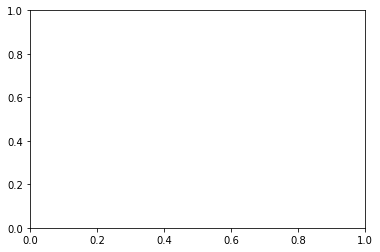

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(df)

In [ ]:
!pip install arch

     |████████████████████████████████| 870kB 8.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for arch: filename=arch-4.16.1-cp36-cp36m-linux_x86_64.whl size=1179477 sha256=53670687b94004b2e26eb75c8547542fc6b8364fa63b6197662c983e70f4e642
  Stored in directory: /root/.cache/pip/wheels/a9/99/58/8fb4c930bff0a8c4deff117a09a7de19c2001099298976fbb1
Successfully built arch


In [ ]:

import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df.head(50)

#       DATE TRADING CODE  ...     VOLUME  daily_ret  volatility
36  403 2018-01-10       ABBANK  ...    349,439   0.000000    0.000000
59  380 2018-01-11       ABBANK  ...    395,514  -0.087302    0.000000
37  402 2018-02-10       ABBANK  ...    526,280   0.086957    0.000000
79  360 2018-02-12       ABBANK  ...    768,778  -0.080000    0.000000
16  423 2018-03-09       ABBANK  ...    354,776   0.156522    0.000000
38  401 2018-03-10       ABBANK  ...    643,640  -0.067669    0.000000
80  359 2018-03-12       ABBANK  ...    610,105  -0.080645    0.000000
17  422 2018-04-09       ABBANK  ...    339,729   0.149123    0.000000
39  400 2018-04-10       ABBANK  ...    607,851  -0.053435    0.000000
60  379 2018-04-11       ABBANK  ...    488,611  -0.088710    0.000000
81  358 2018-04-12       ABBANK  ...     83,719   0.035398    0.000000
0   439 2018-05-08       ABBANK  ...    224,757   0.017094    0.000000
18  421 2018-05-09       ABBANK  ...     54,508   0.100840    0.000000
61  378 2018-05-11       ABBANK  ...    330,437  -0.122137    0.000000
82  357 2018-05-12       ABBANK  ...    396,799   0.008696    0.000000
1   438 2018-06-08       ABBANK  ...    158,467   0.025862    0.000000
19  420 2018-06-09       ABBANK  ...    497,662   0.092437    0.000000
62  377 2018-06-11       ABBANK  ...    680,421  -0.123077    0.000000
83  356 2018-06-12       ABBANK  ...    259,562   0.008772    0.000000
2   437 2018-07-08       ABBANK  ...    186,217   0.043478    0.000000
40  399 2018-07-10       ABBANK  ...    282,294   0.033333    8.489029
63  376 2018-07-11       ABBANK  ...    687,816  -0.072581    8.646624
3   436 2018-08-08       ABBANK  ...    525,104   0.060870    8.509019
41  398 2018-08-10       ABBANK  ...    857,538   0.008197    8.306647
64  375 2018-08-11       ABBANK  ...    368,386  -0.056911    8.206675
6   433 2018-08-13       ABBANK  ...    387,490   0.077586    7.631846
7   432 2018-08-14       ABBANK  ...    206,618   0.000000    7.473801
8   431 2018-08-16       ABBANK  ...    331,263   0.024000    7.232792
9   430 2018-08-19       ABBANK  ...    379,411   0.031250    6.503816
10  429 2018-08-20       ABBANK  ...    452,099   0.007576    6.376831
11  428 2018-08-26       ABBANK  ...    519,878  -0.015038    6.026631
12  427 2018-08-27       ABBANK  ...    374,179   0.000000    5.998071
13  426 2018-08-28       ABBANK  ...    732,500   0.045802    6.054307
14  425 2018-08-29       ABBANK  ...    268,670   0.000000    5.673399
15  424 2018-08-30       ABBANK  ...    447,773   0.007299    4.886200
4   435 2018-09-08       ABBANK  ...    906,224  -0.094203    5.388796
20  419 2018-09-09       ABBANK  ...    126,467   0.032000    5.402334
42  397 2018-09-10       ABBANK  ...    488,119  -0.062016    5.204109
84  355 2018-09-12       ABBANK  ...    254,216  -0.049587    4.556579
24  415 2018-09-13       ABBANK  ...    422,164   0.086957    4.924232
25  414 2018-09-16       ABBANK  ...     98,069  -0.016000    4.863391
26  413 2018-09-17       ABBANK  ...    423,678   0.000000    4.811196
27  412 2018-09-18       ABBANK  ...    538,534   0.016260    4.515927
28  411 2018-09-19       ABBANK  ...    302,118   0.016000    4.340899
29  410 2018-09-20       ABBANK  ...    172,801   0.000000    4.339506
30  409 2018-09-23       ABBANK  ...    204,509  -0.015748    4.146763
31  408 2018-09-24       ABBANK  ...  1,015,160   0.016000    3.807065
32  407 2018-09-25       ABBANK  ...    387,103   0.000000    3.807065
33  406 2018-09-26       ABBANK  ...    188,370   0.000000    3.771862
34  405 2018-09-27       ABBANK  ...    102,802   0.000000    3.704748

[50 rows x 14 columns]

In [ ]:

start = datetime(2018,1,10)
end = datetime(2020,12,7)

In [ ]:
df.index = pd.to_datetime(df['DATE'])

In [ ]:
df = df.set_index('DATE')


In [ ]:
returns = df['daily_ret']

In [ ]:
volatility = df['volatility']

Text(0.5, 1.0, ' daily returns')

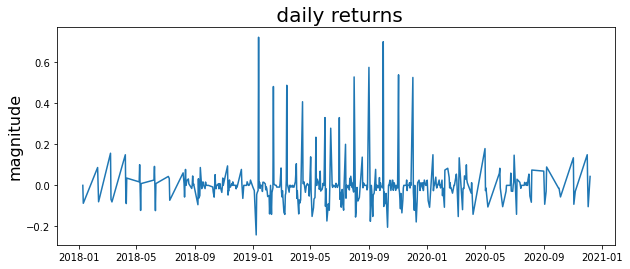

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('magnitude', fontsize=16)
plt.title(' daily returns', fontsize=20)

Text(0.5, 1.0, ' volatility')

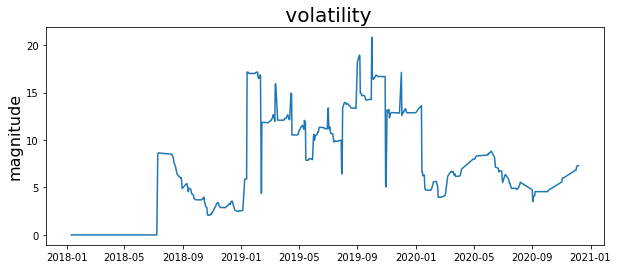

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(volatility)
plt.ylabel('magnitude', fontsize=16)
plt.title(' volatility', fontsize=20)

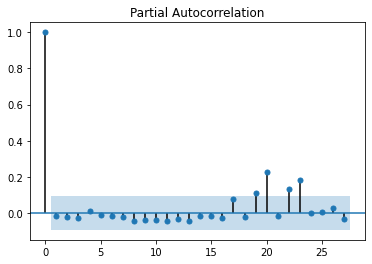

In [ ]:

plot_pacf(returns**2)
plt.show()

In [ ]:
model = arch_model(returns, p=3, q=0)

In [ ]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -313.008613134021
Iteration:      2,   Func. Count:     19,   Neg. LLF: -313.682973401189
Iteration:      3,   Func. Count:     29,   Neg. LLF: -364.2498082297137
Iteration:      4,   Func. Count:     36,   Neg. LLF: -374.87655187232076
Iteration:      5,   Func. Count:     43,   Neg. LLF: -375.099856849984
Iteration:      6,   Func. Count:     50,   Neg. LLF: -377.486673159332
Iteration:      7,   Func. Count:     57,   Neg. LLF: -378.78123575106486
Iteration:      8,   Func. Count:     64,   Neg. LLF: -379.1824547263592
Iteration:      9,   Func. Count:     76,   Neg. LLF: -379.47491720332437
Iteration:     10,   Func. Count:     85,   Neg. LLF: -379.55783646383014
Iteration:     11,   Func. Count:     92,   Neg. LLF: -379.55847156775354
Iteration:     12,   Func. Count:     99,   Neg. LLF: -379.5584735128606
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -379.5584751485376
            I

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01039. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              daily_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                379.558
Distribution:                  Normal   AIC:                          -749.117
Method:            Maximum Likelihood   BIC:                          -728.694
                                        No. Observations:                  439
Date:                Fri, Feb 19 2021   Df Residuals:                      438
Time:                        03:49:18   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.0487e-03  4.604e-03      0.662      0.508 [-5.975e-03,1.207e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0104  2.292e-03      4.533  5.812e-06  [5.897e-03,1.488e-02]
alpha[1]   1.1840e-10  2.027e-02  5.842e-09      1.000 [-3.972e-02,3.972e-02]
alpha[2]   1.8525e-10  3.881e-02  4.773e-09      1.000 [-7.607e-02,7.607e-02]
alpha[3]   2.0702e-10  1.958e-02  1.057e-08      1.000 [-3.839e-02,3.839e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
test_size = 435

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=2)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004992. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.


/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008984. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.


/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning:

y is poorly scaled, which may a

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=volatility.index[-435:])

In [ ]:
predicted = rolling_predictions

In [ ]:
df['predicted']= predicted

In [ ]:
df.predicted.tail(10)

DATE
2020-10-02    0.102357
2020-10-03    0.102240
2020-10-06    0.102126
2020-11-02    0.102047
2020-11-03    0.102123
2020-11-06    0.102106
2020-12-01    0.102003
2020-12-02    0.102128
2020-12-03    0.102009
2020-12-07    0.102018
Name: predicted, dtype: float64

In [ ]:
df.volatility.tail(10)

DATE
2020-10-02    4.558706
2020-10-03    4.573360
2020-10-06    4.749736
2020-11-02    5.585318
2020-11-03    5.982885
2020-11-06    6.020292
2020-12-01    6.841300
2020-12-02    6.841300
2020-12-03    7.249879
2020-12-07    7.308435
Name: volatility, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

rmse =mean_squared_error(rolling_predictions, df.volatility,squared=False)

print(rmse)


ValueError: ignored

In [ ]:

df = df.loc[(df.index < start_remove) | (df.index > end_remove)]

In [ ]:
start_remove = pd.to_datetime('2018-01-10')
end_remove = pd.to_datetime('2018-02-12')

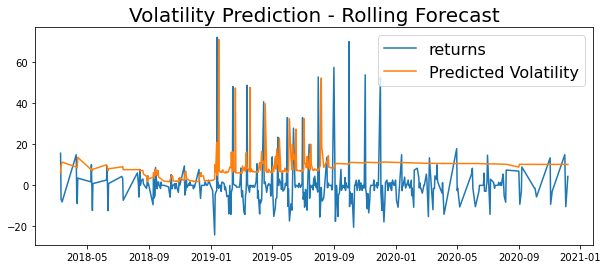

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-435:])
preds, = plt.plot(rolling_predictions)

plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['returns', 'Predicted Volatility'], fontsize=16)

In [ ]:

train = volatility
model = arch_model(train, p=3, q=0)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=7)
future_dates = [volatility.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

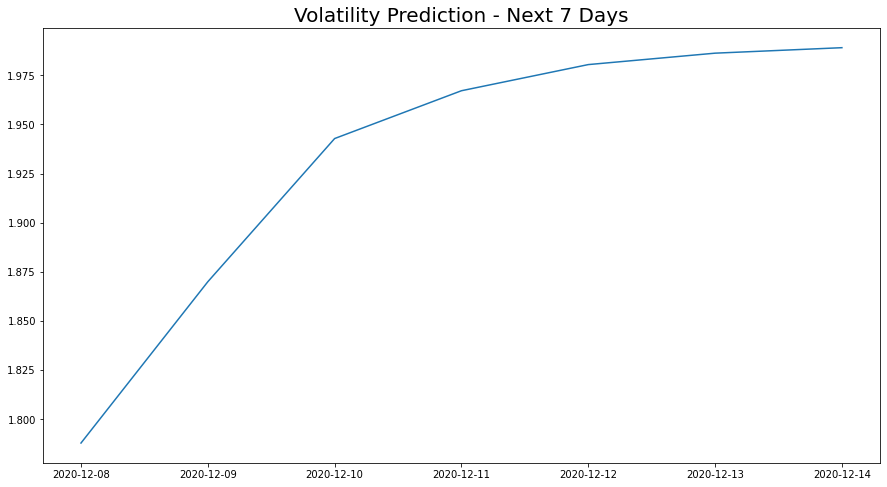

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)